In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('mushrooms.csv', low_memory = False)

## Value Coding Dictionary:

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Pre-Presentation Section

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Data Cleaning ##

We dropped veil-type because there was only one unique value

In [7]:
df.drop("veil-type",axis=1,inplace=True)

According to data dictionary we identified that "?" was used instead of nan to indicate missing values

In [8]:
df = df[df['stalk-root'] != '?']

In [9]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,e,b,y,n,f,n,f,c,b,w,...,y,y,n,n,w,t,p,w,y,p
8001,e,x,y,n,f,n,f,c,b,w,...,y,y,n,n,w,t,p,w,y,p
8038,e,x,y,g,t,n,f,c,b,w,...,s,s,w,w,w,t,p,w,y,p
8095,p,x,y,c,f,m,f,c,b,y,...,k,y,c,c,w,n,n,w,c,d


### Target (Edible) Column ###

In [11]:
df['class'].head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [10]:
df['edible'] = (df['class'] == 'e') + 0.0
df.drop(columns= 'class', inplace = True)

df.edible.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: edible, dtype: float64

In [11]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'edible'],
      dtype='object')

1. DEFINE EDIBLE COLUMN AND DROP CLASS COLUMN 
2. CREATE DUMMY VARIABLES FOR ALL THE COLUMNS

### get_dummies ###

In [12]:
df_dummy = pd.get_dummies(df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',\
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',\
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',\
       'stalk-surface-below-ring', 'stalk-color-above-ring',\
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',\
       'spore-print-color', 'population', 'habitat']], drop_first = True)

df_dummy


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8001,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8038,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8095,0,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
df.columns

df.drop(columns= ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',\
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',\
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',\
       'stalk-surface-below-ring', 'stalk-color-above-ring',\
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',\
       'spore-print-color', 'population', 'habitat'], inplace = True)


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'edible'],
      dtype='object')

In [14]:
df = pd.concat([df, df_dummy], axis = 1)

### Drop duplicates ###

In [15]:
df.columns

df = df.T.drop_duplicates().T

Index(['edible', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_g', 'stalk-color-above-ring_n',
       'stalk-color-above-ring_p', 'stalk-color-above-ring_w',
       'stalk-color-a

In [16]:
df.columns

Index(['edible', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_p',
       'stalk-color-above-ring_w', 'stalk-color-above-ring_y',
       'stalk-color-b

## RandomForestClassifier ##

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',\
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',\
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',\
       'cap-color_p', 'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c',\
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'gill-attachment_f',\
       'gill-spacing_w', 'gill-size_n', 'gill-color_h', 'gill-color_k',\
       'gill-color_n', 'gill-color_p', 'gill-color_r', 'gill-color_u',\
       'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_c',\
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',\
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',\
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',\
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_g',\
       'stalk-color-above-ring_n', 'stalk-color-above-ring_p',\
       'stalk-color-above-ring_w', 'stalk-color-above-ring_y',\
       'stalk-color-below-ring_g', 'stalk-color-below-ring_n',\
       'stalk-color-below-ring_p', 'stalk-color-below-ring_w', 'ring-number_o',\
       'ring-number_t', 'ring-type_p', 'spore-print-color_k',\
       'spore-print-color_n', 'spore-print-color_r', 'spore-print-color_u',\
       'spore-print-color_w', 'population_c', 'population_n', 'population_s',\
       'population_v', 'population_y', 'habitat_g', 'habitat_l', 'habitat_m',\
       'habitat_p', 'habitat_u']]


y = df['edible']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size= .2,\
                                                    random_state=42)


In [18]:
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_p',
       'stalk-color-above-ring_w', 'stalk-color-above-ring_y',
       'stalk-color-below-ring_

In [19]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

### Accuracy Score (roc_auc_score) ###

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])

1.0

In [21]:
y_pred = forest.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

In [23]:
y_train.value_counts()

1.0    2783
0.0    1732
Name: edible, dtype: int64

### Feature Importance ###

In [24]:
# feature importance
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = forest.feature_importances_

In [25]:
forest_importances = pd.Series(importances, index=X.columns)

<AxesSubplot:>

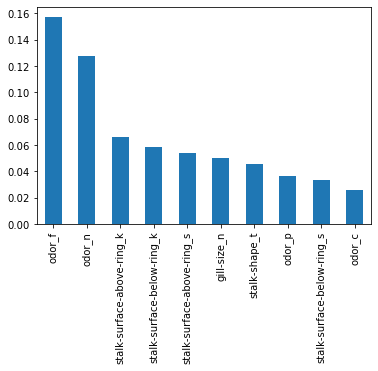

In [26]:
fig, ax = plt.subplots()
forest_importances.nlargest(10).plot.bar()

In [27]:
forest_importances.nlargest(5)

odor_f                        0.157347
odor_n                        0.127677
stalk-surface-above-ring_k    0.066423
stalk-surface-below-ring_k    0.058674
stalk-surface-above-ring_s    0.053628
dtype: float64

<AxesSubplot:xlabel='edible', ylabel='count'>

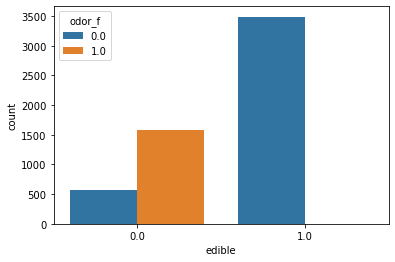

In [28]:
sns.countplot(data=df, x="edible", hue="odor_f")

<AxesSubplot:xlabel='edible', ylabel='count'>

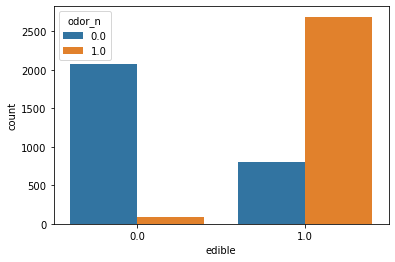

In [29]:
sns.countplot(data=df, x="edible", hue="odor_n")

<AxesSubplot:xlabel='edible', ylabel='count'>

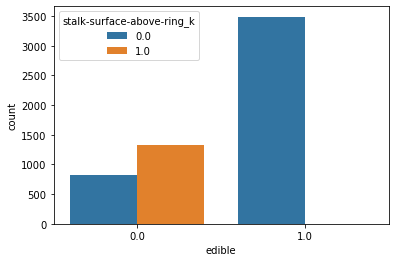

In [30]:
sns.countplot(data=df, x="edible", hue="stalk-surface-above-ring_k")

<AxesSubplot:xlabel='edible', ylabel='count'>

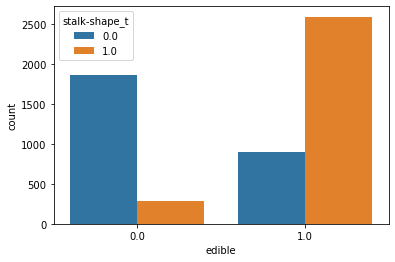

In [31]:
sns.countplot(data=df, x="edible", hue="stalk-shape_t")

<AxesSubplot:xlabel='edible', ylabel='count'>

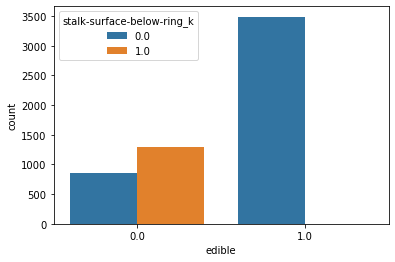

In [32]:
sns.countplot(data=df, x="edible", hue="stalk-surface-below-ring_k")

In [33]:
df['stalk-surface-below-ring_k'].value_counts()

0.0    4348
1.0    1296
Name: stalk-surface-below-ring_k, dtype: int64

In [34]:
df['stalk-surface-above-ring_k'].value_counts()

0.0    4312
1.0    1332
Name: stalk-surface-above-ring_k, dtype: int64

In [35]:
#https://www.kaggle.com/code/yugandhar123/unsupervised-approach-kmeans-clustering
# unsupervised method K means clustering 

At this point, consider unsupervised learning to see if we can get any other information on the accuracy. 

Use PCA and K-Means Clustering to evaluate.

## PCA ##

In [36]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to mushroom data
pca.fit(X_train)

# transform data onto the first two principal components
X_pca = pca.transform(X_train)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

PCA(n_components=2)

Original shape: (4515, 70)
Reduced shape: (4515, 2)


In [37]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
columns = list(df.columns)

PCA component shape: (2, 70)
PCA components:
[[-6.58270234e-05  3.45105421e-02  2.09368085e-03 -2.43249880e-03
  -7.75826921e-03 -4.07931968e-04 -8.87676073e-02  5.18268914e-02
   1.81155174e-03 -4.81653600e-02  9.06463094e-02 -8.86442360e-02
  -6.78158661e-03 -7.32874462e-02  1.29941960e-01 -2.54808842e-01
  -1.31134755e-02  3.02930266e-01 -3.29518549e-02  5.15562271e-03
  -2.02896113e-01 -2.78728478e-02 -2.57524268e-03 -6.05577238e-02
  -5.82937989e-02  9.74980426e-02 -3.14805410e-02 -8.46370070e-02
   3.72340894e-02 -2.01350905e-03 -3.96573451e-02 -6.85554268e-02
   3.22580789e-03 -2.07579084e-01 -4.09118310e-02 -7.94232168e-02
  -7.07482464e-03  3.16820861e-01 -3.01118785e-01  1.81242575e-03
   3.11665238e-01 -2.94434582e-01 -1.06776183e-04 -4.74853128e-02
   1.07031064e-01  6.30796783e-02 -2.30553410e-01  7.08279848e-04
  -4.63374517e-02  1.10088330e-01  6.37997447e-02 -2.31905552e-01
   2.29469033e-03 -7.45031304e-03 -2.74399714e-01 -1.44648710e-01
  -1.51759693e-01 -6.00125600e-

([<matplotlib.axis.YTick at 0x11a4e1970>,
 [Text(0, 0, 'First component'), Text(0, 1, 'Second component')])

([<matplotlib.axis.XTick at 0x11afa7970>,
 [Text(0, 1, 'edible'),
  Text(1, 1, 'cap-shape_c'),
  Text(2, 1, 'cap-shape_f'),
  Text(3, 1, 'cap-shape_k'),
  Text(4, 1, 'cap-shape_s'),
  Text(5, 1, 'cap-shape_x'),
  Text(6, 1, 'cap-surface_g'),
  Text(7, 1, 'cap-surface_s'),
  Text(8, 1, 'cap-surface_y'),
  Text(9, 1, 'cap-color_c'),
  Text(10, 1, 'cap-color_e'),
  Text(11, 1, 'cap-color_g'),
  Text(12, 1, 'cap-color_n'),
  Text(13, 1, 'cap-color_p'),
  Text(14, 1, 'cap-color_w'),
  Text(15, 1, 'cap-color_y'),
  Text(16, 1, 'bruises_t'),
  Text(17, 1, 'odor_c'),
  Text(18, 1, 'odor_f'),
  Text(19, 1, 'odor_l'),
  Text(20, 1, 'odor_m'),
  Text(21, 1, 'odor_n'),
  Text(22, 1, 'odor_p'),
  Text(23, 1, 'gill-attachment_f'),
  Text(24, 1, 'gill-spacing_w'),
  Text(25, 1, 'gill-size_n'),
  Text(26, 1, 'gill-color_h'),
  Text(27, 1, 'gill-color_k'),
  Text(28, 1, 'gill-color_n'),
  Text(29, 1, 'gill-color_p'),
  Text(30, 1, 'gill-color_r'),
  Text(31, 1, 'gill-color_u'),
  Text(32, 1, 'gill-colo

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Principal components')

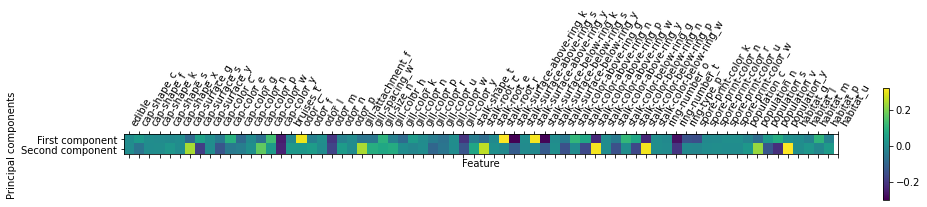

In [38]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(columns)),
           columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

PCA()

<Figure size 432x288 with 0 Axes>

(0.0, 70.0, 0.0, 1.0)

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Cumulative Explained Variance')

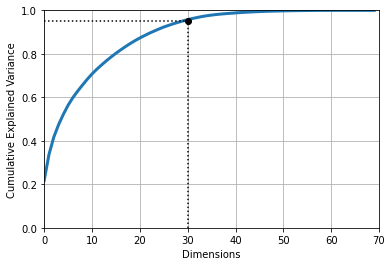

In [39]:
pca_changed = PCA()
# fit PCA model to mushroom data
pca_changed.fit(X_train)

# transform data onto the first two principal components
X_pca_changed = pca_changed.transform(X_train)
cumsum = np.cumsum(pca_changed.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
# HOML, Figure 8–8
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 70, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
#plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
#             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [40]:
pca_30 = PCA(n_components = 30)
X_30 = pca_30.fit(X_train)

X_pca_30 = pca_30.transform(X_train)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca_30.shape)))

Original shape: (4515, 70)
Reduced shape: (4515, 30)


## K-Means Clustering ##

### Finding Optimal Number of Clusters ###

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

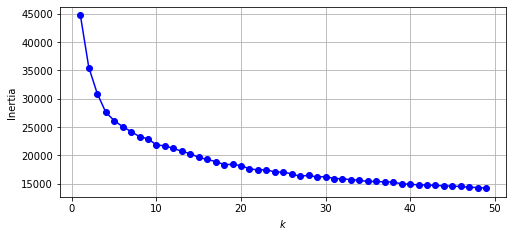

In [41]:
from sklearn.cluster import KMeans

# HOML, Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 50)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 50), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
#plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
#             arrowprops=dict(facecolor='black', shrink=0.1))
#plt.text(4.5, 650, "Elbow", horizontalalignment="center")
#plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

### K-Means ###

In [42]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
kmeans_30 = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
y_pred = kmeans.fit_predict(X_pca)
y_pred_30 = kmeans_30.fit_predict(X_pca_30)


<Figure size 576x288 with 0 Axes>

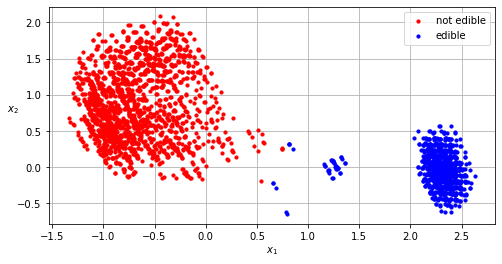

In [43]:
# HOML, Figure 9–2
def plot_clusters(X_pca, y=None):
    plt.scatter(X_pca[y_pred == 0,0], X_pca[y_pred == 0,1], c='red', s=10, label = 'not edible')
    plt.scatter(X_pca[y_pred == 1,0], X_pca[y_pred == 1,1], c='blue', s=10, label = 'edible')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

plt.figure(figsize=(8, 4))
#plt.xlim(-7.5,10)
#plt.ylim(-4,8)
plot_clusters(X_pca)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()


In [44]:
from sklearn.metrics import roc_auc_score
#when 2 dimensions
roc_auc_score(y_train, y_pred)

#when 30 dimensions
roc_auc_score(y_train, y_pred_30)

0.6058718846443973

0.6027496827903496

In [45]:
#when 2 dimensions
kmeans.score(X_pca)

#when 30 dimensions
kmeans_30.score(X_pca_30)

-1115.829755189636

-22871.293189942942

KMeans(init='random', n_clusters=2, n_init=1, random_state=42)

KMeans(init='random', n_clusters=3, n_init=1, random_state=42)

KMeans(init='random', n_clusters=4, n_init=1, random_state=42)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Results')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Results')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Results')

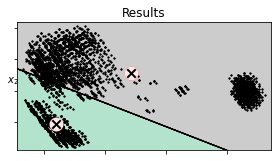

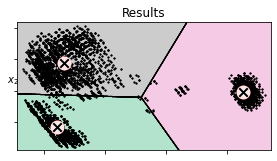

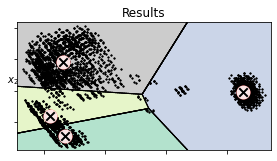

In [46]:
def plot_data(X_pca):
    plt.plot(X_pca[:, 0], X_pca[:, 1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# HOML, Figure 9–4
kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1, random_state=42)
kmeans_iter1.fit(X_pca)

kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1, random_state=42)
kmeans_iter2.fit(X_pca)

kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1, random_state=42)
kmeans_iter3.fit(X_pca)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plot_decision_boundaries(kmeans_iter1, X_pca, show_xlabels=False,
                         show_ylabels=False)
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Results")

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r', cross_color='w')
plot_decision_boundaries(kmeans_iter2, X_pca, show_xlabels=False,
                         show_ylabels=False)
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Results")

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='w')
plot_decision_boundaries(kmeans_iter3, X_pca, show_xlabels=False,
                         show_ylabels=False)
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Results")

In [47]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [48]:
X_train_reduced = kmeans.transform(X_train_pca)
X_test_reduced = kmeans.transform(X_test_pca)

forest = RandomForestClassifier()
forest.fit(X_train_reduced, y_train)

forest.score(X_test_reduced, y_test)

RandomForestClassifier()

0.9220549158547388

# Post Presentation Section

We wanted to see if encoding would create different insights with our series of models

In [49]:
df_new =pd.read_csv('mushrooms.csv', low_memory = False)

In [50]:
df_new.drop("veil-type",axis=1,inplace=True)

In [51]:
df_new = df_new[df_new['stalk-root'] != '?']

In [52]:
df_new['class'] = (df_new['class'] == 'e') + 0.0

In [53]:
df_new.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,1.0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,1.0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,0.0,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,1.0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [54]:
labelencoder=LabelEncoder()
for col in df_new.columns:
    df_new[col] = labelencoder.fit_transform(df_new[col])

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-color'}>,
        <AxesSubplot:title={'center':'ring-number'}>

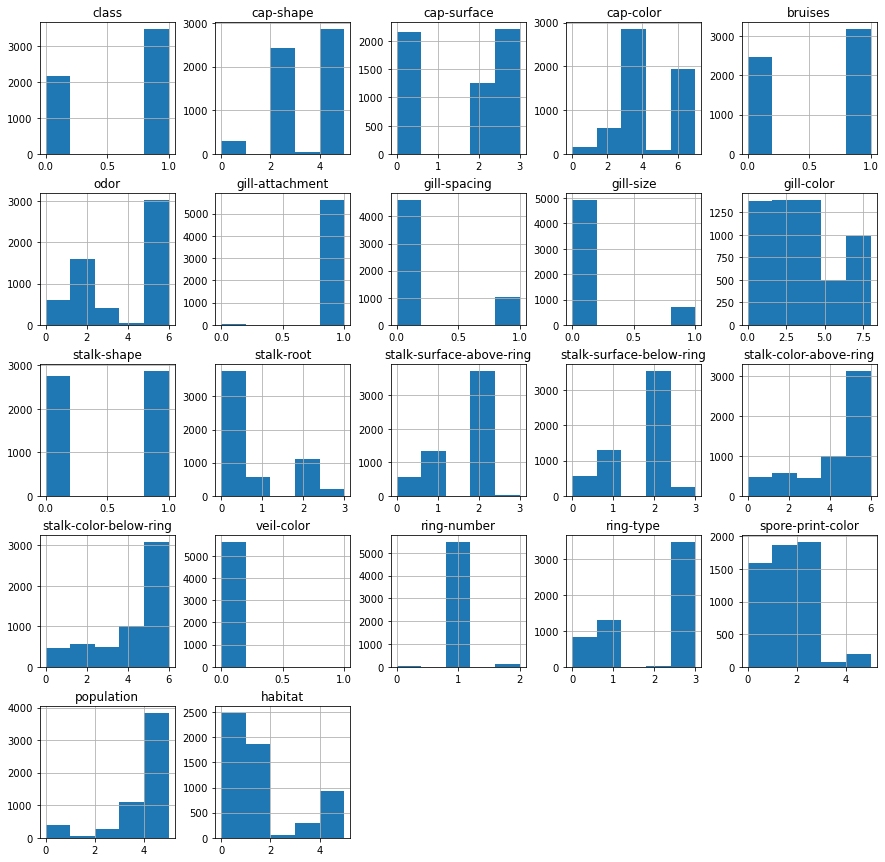

In [55]:
df_new.hist(bins=5, figsize=(15,15))

## RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_new[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',\
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',\
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',\
       'stalk-surface-below-ring', 'stalk-color-above-ring',\
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',\
       'spore-print-color', 'population', 'habitat']]


y = df_new['class']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size= .2,\
                                                    random_state=42)

In [58]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

## Accuracy Score (roc_auc_score)

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])

1.0

In [60]:
y_pred = forest.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



## Feature Importance

In [63]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = forest.feature_importances_

In [64]:
forest_importances = pd.Series(importances, index=X.columns)

<AxesSubplot:>

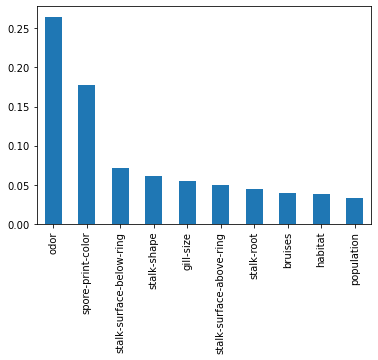

In [65]:
fig, ax = plt.subplots()
forest_importances.nlargest(10).plot.bar()

In [66]:
forest_importances.nlargest(5)

odor                        0.264941
spore-print-color           0.178176
stalk-surface-below-ring    0.070951
stalk-shape                 0.061021
gill-size                   0.054357
dtype: float64

<AxesSubplot:xlabel='class', ylabel='count'>

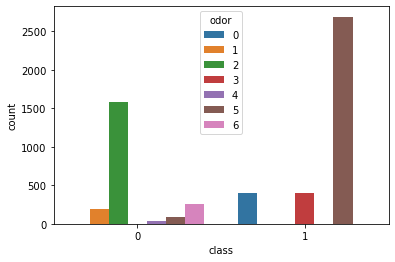

In [67]:
sns.countplot(data=df_new, x="class", hue="odor")

<AxesSubplot:xlabel='class', ylabel='count'>

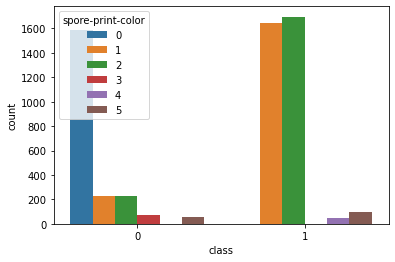

In [68]:
sns.countplot(data=df_new, x="class", hue="spore-print-color")

<AxesSubplot:xlabel='class', ylabel='count'>

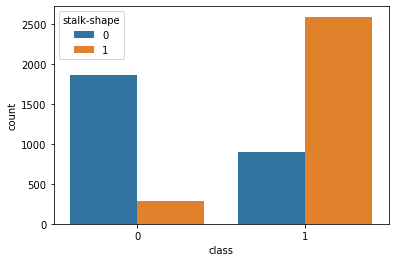

In [69]:
sns.countplot(data=df_new, x="class", hue="stalk-shape")

<AxesSubplot:xlabel='class', ylabel='count'>

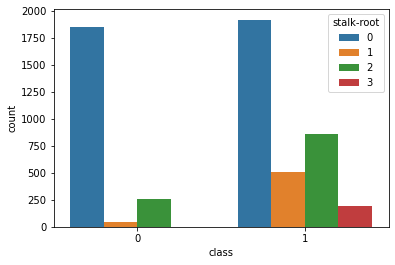

In [70]:
sns.countplot(data=df_new, x="class", hue="stalk-root")

<AxesSubplot:xlabel='class', ylabel='count'>

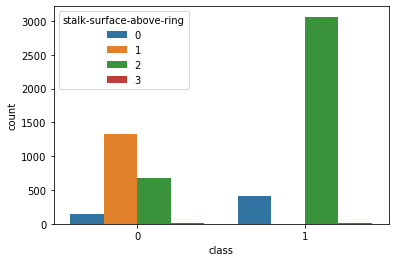

In [71]:
sns.countplot(data=df_new, x="class", hue="stalk-surface-above-ring")

#### A few traits are only seen in poisonous mushrooms, leading to high performance

## PCA

In [72]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = .8, test_size= .2,\
                                                    random_state=42)

## Create 2 Principle Component Set

In [74]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to mushroom data
pca.fit(X_train)

# transform data onto the first two principal components
X_pca = pca.transform(X_train)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

PCA(n_components=2)

Original shape: (4515, 21)
Reduced shape: (4515, 2)


In [75]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
columns = list(X.columns)

PCA component shape: (2, 21)
PCA components:
[[ 0.02704786 -0.07970176  0.15525255 -0.42357032 -0.21398855  0.00661283
   0.13420526 -0.08270443 -0.32608929 -0.19215551  0.03946488 -0.36060974
  -0.34516401 -0.15627709 -0.15377747 -0.02348683 -0.08286208 -0.40909866
  -0.28119405 -0.09332934  0.11870964]
 [-0.01354821 -0.05535117  0.06795875 -0.08924482  0.1745011  -0.00931244
   0.45219943  0.15928242  0.01535233  0.12802183  0.41941608 -0.02691606
  -0.0024093   0.35172651  0.3384783   0.09256851 -0.00334387 -0.18359291
   0.2551024  -0.42730509  0.04774143]]


([<matplotlib.axis.YTick at 0x11c964c40>,
 [Text(0, 0, 'First component'), Text(0, 1, 'Second component')])

([<matplotlib.axis.XTick at 0x11c95fcd0>,
 [Text(0, 1, 'cap-shape'),
  Text(1, 1, 'cap-surface'),
  Text(2, 1, 'cap-color'),
  Text(3, 1, 'bruises'),
  Text(4, 1, 'odor'),
  Text(5, 1, 'gill-attachment'),
  Text(6, 1, 'gill-spacing'),
  Text(7, 1, 'gill-size'),
  Text(8, 1, 'gill-color'),
  Text(9, 1, 'stalk-shape'),
  Text(10, 1, 'stalk-root'),
  Text(11, 1, 'stalk-surface-above-ring'),
  Text(12, 1, 'stalk-surface-below-ring'),
  Text(13, 1, 'stalk-color-above-ring'),
  Text(14, 1, 'stalk-color-below-ring'),
  Text(15, 1, 'veil-color'),
  Text(16, 1, 'ring-number'),
  Text(17, 1, 'ring-type'),
  Text(18, 1, 'spore-print-color'),
  Text(19, 1, 'population'),
  Text(20, 1, 'habitat')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Principal components')

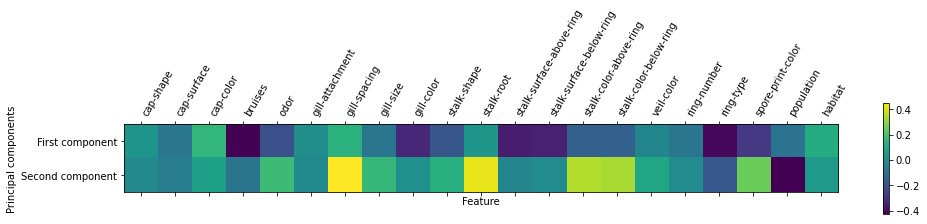

In [76]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(columns)),
           columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Find Optimal Dimension

PCA()

<Figure size 432x288 with 0 Axes>

(0.0, 30.0, 0.0, 1.0)

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Cumulative Explained Variance')

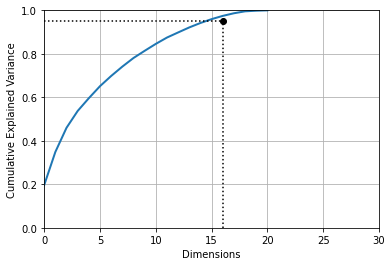

In [77]:
pca_changed = PCA()
# fit PCA model to mushroom data
pca_changed.fit(X_train)

# transform data onto the first two principal components
X_pca_changed = pca_changed.transform(X_train)
cumsum = np.cumsum(pca_changed.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
# HOML, Figure 8–8
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
#plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
#             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

(0.0, 20.0, 0.0, 0.25)

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Explained Variance Ratio')

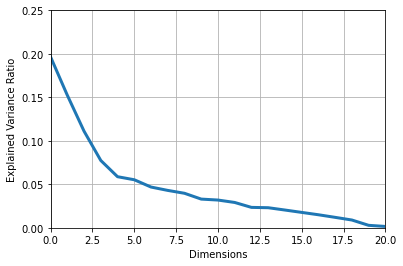

In [78]:
varianceratio = pca_changed.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(varianceratio, linewidth=3)
plt.axis([0, 20, 0, 0.25])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

## Create 15 Component Set

In [79]:
pca_15 = PCA(n_components = 15)
X_15 = pca_15.fit(X_train)

X_pca_15 = pca_15.transform(X_train)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca_15.shape)))

Original shape: (4515, 21)
Reduced shape: (4515, 15)


In [80]:
#Two Components
pca.explained_variance_ratio_.sum()

#15 components
pca_15.explained_variance_ratio_.sum()


0.34892038942552184

0.9419420064408607

## K-Means Clustering

### Finding Optimal Number of Clusters for 2 Component Set ###

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

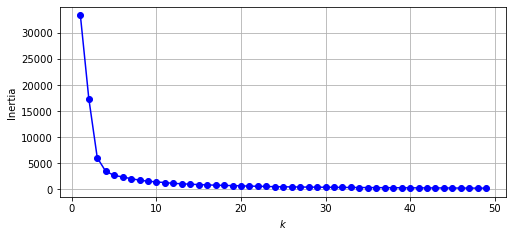

In [81]:
from sklearn.cluster import KMeans

# HOML, Figure 9–8

kmeans_per_k_2 = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 50)]
inertias = [model.inertia_ for model in kmeans_per_k_2]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 50), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
#plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
#             arrowprops=dict(facecolor='black', shrink=0.1))
#plt.text(4.5, 650, "Elbow", horizontalalignment="center")
#plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

### Finding Optimal Number of Clusters for 15 Component Set ###

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

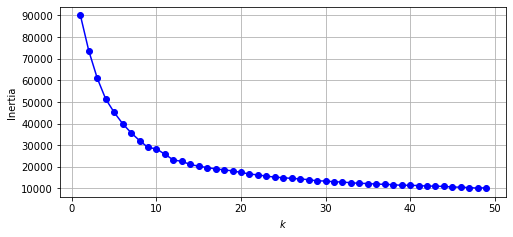

In [82]:
from sklearn.cluster import KMeans

# HOML, Figure 9–8

kmeans_per_k_15 = [KMeans(n_clusters=k, random_state=42).fit(X_pca_15)
                for k in range(1, 50)]
inertias = [model.inertia_ for model in kmeans_per_k_15]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 50), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
#plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
#             arrowprops=dict(facecolor='black', shrink=0.1))
#plt.text(4.5, 650, "Elbow", horizontalalignment="center")
#plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

## Analyze Silhouette Scores for 2PC & 15PC

In [83]:
from sklearn.metrics import silhouette_score

In [84]:
kmeans_2 = KMeans(n_init=1, random_state=42)
kmeans_2.fit(X_pca)

kmeans_15 = KMeans(n_init=1, random_state=42)
kmeans_15.fit(X_pca_15)

KMeans(n_init=1, random_state=42)

KMeans(n_init=1, random_state=42)

### 2 PC 

In [85]:
silhouette_score(X_pca, kmeans_2.labels_)

0.4826782638282581

In [86]:
silhouette_scores_2 = [silhouette_score(X_pca, kmeans_2.labels_)
                     for model in kmeans_per_k[1:]]

<Figure size 792x648 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Cluster')

Text(0.5, 1.0, '$k=3$')

<AxesSubplot:>

Text(0.5, 1.0, '$k=4$')

<AxesSubplot:>

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette Coefficient')

Text(0.5, 1.0, '$k=5$')

<AxesSubplot:>

Text(0.5, 0, 'Silhouette Coefficient')

Text(0.5, 1.0, '$k=6$')

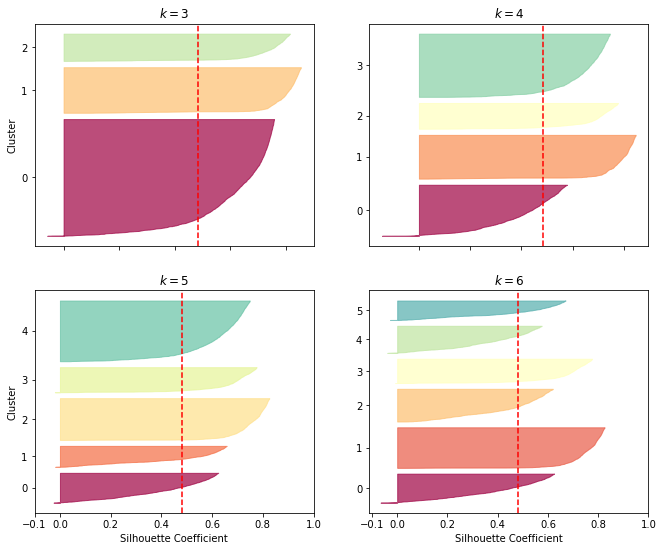

In [87]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k_2[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores_2[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

#### Choose k = 3

### 15 PC 

In [88]:
silhouette_score(X_pca_15, kmeans_15.labels_)

0.3791311836133499

In [89]:
silhouette_scores = [silhouette_score(X_pca_15, kmeans_15.labels_)
                     for model in kmeans_per_k[1:]]

<Figure size 792x648 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Cluster')

Text(0.5, 1.0, '$k=7$')

<AxesSubplot:>

Text(0.5, 1.0, '$k=8$')

<AxesSubplot:>

Text(0, 0.5, 'Cluster')

Text(0.5, 0, 'Silhouette Coefficient')

Text(0.5, 1.0, '$k=9$')

<AxesSubplot:>

Text(0.5, 0, 'Silhouette Coefficient')

Text(0.5, 1.0, '$k=10$')

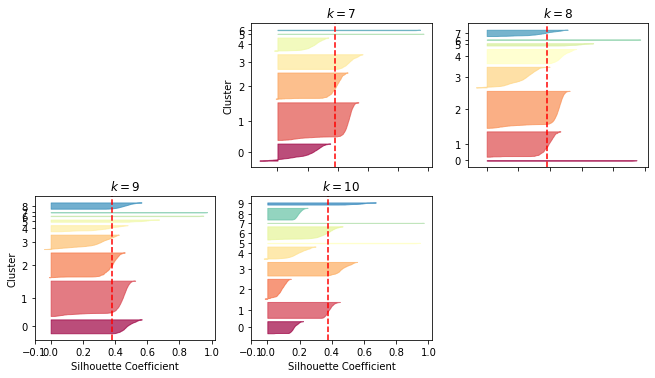

In [90]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (7, 8, 9, 10):
    plt.subplot(3, 3, k - 2)
    
    y_pred = kmeans_per_k_15[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca_15, y_pred)

    padding = len(X_pca_15) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (7, 9):
        plt.ylabel("Cluster")
    
    if k in (9, 10):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

#### Choose k = 9

## Scores with Optimal Parameters

In [91]:
kmeans_2 = KMeans(n_clusters = 3, random_state = 42, n_init = 500)
y_pred_2 = kmeans_2.fit_predict(X_pca)

kmeans_15 = KMeans(n_clusters = 9, random_state = 42, n_init = 500)
y_pred_15 = kmeans_15.fit_predict(X_pca_15)

In [92]:
from sklearn.metrics import roc_auc_score
#when 2 dimensions
roc_auc_score(y_train, y_pred_2)

#when 10 dimensions
roc_auc_score(y_train, y_pred_15)

0.3671285742619118

0.10412069650857773

In [93]:
#when 2 dimensions
kmeans_2.score(X_pca)

#when 10 dimensions
kmeans_15.score(X_pca_15)

-6046.1040572107295

-28777.531381634697

## PCA n_component = 2, k = 3 Cluster Analysis

<Figure size 576x288 with 0 Axes>

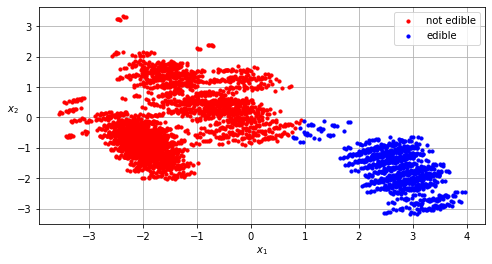

In [94]:
# HOML, Figure 9–2
def plot_clusters(X_pca, y=None):
    plt.scatter(X_pca[y_pred_2 == 0,0], X_pca[y_pred_2 == 0,1], c='red', s=10, label = 'not edible')
    plt.scatter(X_pca[y_pred_2 == 1,0], X_pca[y_pred_2 == 1,1], c='blue', s=10, label = 'edible')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

plt.figure(figsize=(8, 4))
#plt.xlim(-7.5,10)
#plt.ylim(-4,8)
plot_clusters(X_pca)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

#### Very distinct and dense clusters with few outliers might explain high forrest scores

## PCA n_component = 2, k = 3 Decision Boundaries

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Results')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Results')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Results')

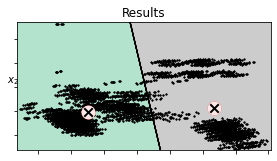

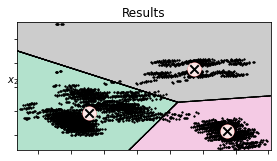

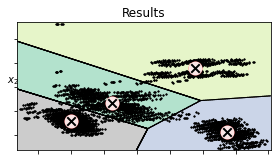

In [95]:
def plot_data(X_pca):
    plt.plot(X_pca[:, 0], X_pca[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X_pca)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# HOML, Figure 9–4
kmeans_iter1 = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_iter1.fit(X_pca)

kmeans_iter2 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_iter2.fit(X_pca)

kmeans_iter3 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_iter3.fit(X_pca)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plot_decision_boundaries(kmeans_iter1, X_pca, show_xlabels=False,
                         show_ylabels=False)
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Results")

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r', cross_color='w')
plot_decision_boundaries(kmeans_iter2, X_pca, show_xlabels=False,
                         show_ylabels=False)
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Results")

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='w')
plot_decision_boundaries(kmeans_iter3, X_pca, show_xlabels=False,
                         show_ylabels=False)
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Results")

## Test Score PC 15

In [96]:
X_train_pca = pca_15.fit_transform(X_train)
X_test_pca = pca_15.transform(X_test)

In [97]:
X_train_reduced = kmeans_15.transform(X_train_pca)
X_test_reduced = kmeans_15.transform(X_test_pca)

forest = RandomForestClassifier()
forest.fit(X_train_reduced, y_train)

forest.score(X_test_reduced, y_test)

RandomForestClassifier()

0.9982285208148804

## Test Score PC 2

In [98]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [99]:
X_train_reduced = kmeans_2.transform(X_train_pca)
X_test_reduced = kmeans_2.transform(X_test_pca)

forest = RandomForestClassifier()
forest.fit(X_train_reduced, y_train)

forest.score(X_test_reduced, y_test)

RandomForestClassifier()

0.9255978742249779